In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(60000, 28, 28)
(60000,)


Text(0.5, 1.0, 'Ground Truth : 3')

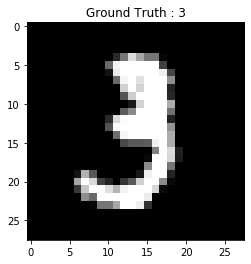

In [2]:
(train_image,train_label),(test_image, test_label) = mnist.load_data()
#display the first image in the training data
print(train_image.shape)
print(train_label.shape)
plt.imshow(train_images[15,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(train_label[15]))
# plt.show()

In [3]:
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_image.shape[1:])
train_data = train_image.reshape(train_image.shape[0],dimData)
test_data = test_image.reshape(test_image.shape[0],dimData)
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


In [4]:
#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# scale data
train_data /=255.0
test_data /=255.0

In [5]:
#change the labels frominteger to one-hot encoding
train_label_one_hot = to_categorical(train_label)
test_label_one_hot = to_categorical(test_label)

In [6]:
#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_label_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_label_one_hot))

[test_loss, test_acc] = model.evaluate(test_data, test_label_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Epoch 1/20
235/235 [==============================] - 4s 17ms/step - loss: 0.2705 - accuracy: 0.9166 - val_loss: 0.2078 - val_accuracy: 0.9298
Epoch 2/20
235/235 [==============================] - 4s 15ms/step - loss: 0.0937 - accuracy: 0.9709 - val_loss: 0.0945 - val_accuracy: 0.9708
Epoch 3/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0590 - accuracy: 0.9809 - val_loss: 0.0938 - val_accuracy: 0.9715
Epoch 4/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0413 - accuracy: 0.9869 - val_loss: 0.0630 - val_accuracy: 0.9812
Epoch 5/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0294 - accuracy: 0.9905 - val_loss: 0.0830 - val_accuracy: 0.9762
Epoch 6/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0226 - accuracy: 0.9926 - val_loss: 0.0728 - val_accuracy: 0.9816
Epoch 7/20
235/235 [==============================] - 3s 15ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0707 - val_accuracy: 0.9838

In [8]:
# Plotting Loss and Accuracy Curve
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


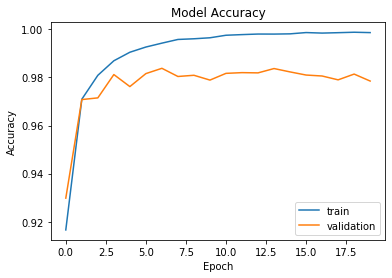

In [9]:
# Plotting the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

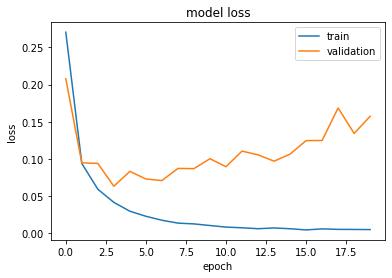

In [10]:
# Curve of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

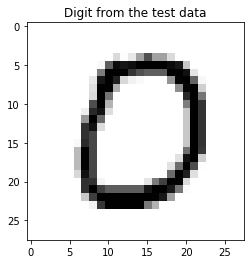

Predicted digit: 0


In [11]:
# Plotting digit from Test Data and predicting it
plt.imshow(test_data[10].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()
pred = model.predict(test_data[15].reshape(1,784))
print("Predicted digit:",pred.argmax())

In [12]:
# Adding more hidden layers 
proto1 = Sequential()
proto1.add(Dense(512, activation='tanh', input_shape=(dimData,)))
proto1.add(Dense(512, activation='tanh'))
proto1.add(Dense(512, activation='tanh'))
proto1.add(Dense(512, activation='tanh'))
proto1.add(Dense(10, activation='sigmoid'))

In [13]:
proto1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = proto1.fit(train_data, train_label_one_hot, batch_size=256, epochs=20, verbose=1,
                   validation_data=(test_data, test_label_one_hot))

[test_loss1, test_acc1] = proto1.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss1, test_acc1))

Epoch 1/20
235/235 [==============================] - 8s 33ms/step - loss: 0.4715 - accuracy: 0.8532 - val_loss: 0.2306 - val_accuracy: 0.9281
Epoch 2/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1680 - accuracy: 0.9474 - val_loss: 0.2309 - val_accuracy: 0.9275
Epoch 3/20
235/235 [==============================] - 7s 32ms/step - loss: 0.1105 - accuracy: 0.9652 - val_loss: 0.1094 - val_accuracy: 0.9663
Epoch 4/20
235/235 [==============================] - 7s 32ms/step - loss: 0.0806 - accuracy: 0.9743 - val_loss: 0.1249 - val_accuracy: 0.9610
Epoch 5/20
235/235 [==============================] - 8s 33ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0937 - val_accuracy: 0.9716
Epoch 6/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0896 - val_accuracy: 0.9747
Epoch 7/20
235/235 [==============================] - 8s 32ms/step - loss: 0.0353 - accuracy: 0.9886 - val_loss: 0.0849 - val_accuracy: 0.9754